# Python for (open) Neuroscience

_Lecture 1.4_ - Advanced `pandas`

Luigi Petrucco

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2024/blob/main/lectures/Lecture1.4_More-pandas.ipynb)

## Organize data in `DataFrame`s

A very common issue in data science is: how to organize our datasets?

In [16]:
import numpy as np
import pandas as pd 

n_subjects = 4
n_repetitions = 3
subject_data = [{"accuracy":np.random.rand(), "speed":np.random.rand()}  for _ in range(n_repetitions)]

In [17]:
# Imagine we present subject with three trials of a stimulus. 
# during every trial, we measure 2 variables (eg, accuracy and speed).

# We could represent the data entries for each stimulus as a dictionary, 
# and the data for all trials for a subject as a list of dictionaries:
subject_data

[{'accuracy': 0.16075910984300767, 'speed': 0.15922071083843237},
 {'accuracy': 0.00563434240038152, 'speed': 0.309608207943858},
 {'accuracy': 0.4658876345146439, 'speed': 0.6645590600705459}]

In [18]:
all_subjects_data = dict()

for i in range(n_subjects):
    all_subjects_data[f"subj_{i}"] = \
        [{"accuracy":np.random.rand(), "speed":np.random.rand()} for _ in range(n_repetitions)]
all_subjects_data

{'subj_0': [{'accuracy': 0.8674398250887215, 'speed': 0.7230950578846399},
  {'accuracy': 0.6519191198041989, 'speed': 0.05796275867709533},
  {'accuracy': 0.5022580227126303, 'speed': 0.6736083010935595}],
 'subj_1': [{'accuracy': 0.7762853765813037, 'speed': 0.6372946717624498},
  {'accuracy': 0.7409386424101293, 'speed': 0.5701249730204873},
  {'accuracy': 0.6875205860451687, 'speed': 0.753995455738963}],
 'subj_2': [{'accuracy': 0.2332921194793861, 'speed': 0.21441627765669757},
  {'accuracy': 0.12320503912863778, 'speed': 0.9158441507979346},
  {'accuracy': 0.9334308397167561, 'speed': 0.9832168383204063}],
 'subj_3': [{'accuracy': 0.2401653765109638, 'speed': 0.5235205909616608},
  {'accuracy': 0.40154922300465734, 'speed': 0.21790507684834737},
  {'accuracy': 0.6570287072259829, 'speed': 0.17486655355597702}]}

In [19]:
# Imagine we have 4 experimental subjects: we could pool the data 
# for all subjects as a dictionary of lists of dictionaries.

from pprint import pp  # Pretty print function! Just learned about this
pp(all_subjects_data)

{'subj_0': [{'accuracy': 0.8674398250887215, 'speed': 0.7230950578846399},
            {'accuracy': 0.6519191198041989, 'speed': 0.05796275867709533},
            {'accuracy': 0.5022580227126303, 'speed': 0.6736083010935595}],
 'subj_1': [{'accuracy': 0.7762853765813037, 'speed': 0.6372946717624498},
            {'accuracy': 0.7409386424101293, 'speed': 0.5701249730204873},
            {'accuracy': 0.6875205860451687, 'speed': 0.753995455738963}],
 'subj_2': [{'accuracy': 0.2332921194793861, 'speed': 0.21441627765669757},
            {'accuracy': 0.12320503912863778, 'speed': 0.9158441507979346},
            {'accuracy': 0.9334308397167561, 'speed': 0.9832168383204063}],
 'subj_3': [{'accuracy': 0.2401653765109638, 'speed': 0.5235205909616608},
            {'accuracy': 0.40154922300465734, 'speed': 0.21790507684834737},
            {'accuracy': 0.6570287072259829, 'speed': 0.17486655355597702}]}


This is now organized but very **nested**! it is not easy to perform statistics on it.

In [12]:
# Imagine we want to average the results across all subjects for variable_1:
means = []
for subject_results in all_subjects_data.values():
    for result in subject_results:
        means.append(result["speed"])
np.mean(means)

0.3752314866966164

When we organize data in pandas dataframes, there is an important principle to keep in mind:

**keep them as flat as possible**

`flat` = opposite of nested

`nested` = lists of dictionaries of lists of dictionaries of dataframes of...



Remember!


    🪷 The Zen of Python 🪷
        
        Flat is better than nested

In [20]:
# We can turn the data into a dataframe (does not matter how we do it here! this is just an ugly example)
flat_list_of_dicts = []

for sub in all_subjects_data.keys():
    for n_rep in range(n_repetitions):
        trial_dict = all_subjects_data[sub][n_rep]
        trial_dict.update({"subject": sub, "repetition": n_rep})
        
        flat_list_of_dicts.append(trial_dict)
                    
trials_df = pd.DataFrame(flat_list_of_dicts)
trials_df


,accuracy,speed,subject,repetition
0,0.867440,0.723095,subj_0,0
1,0.651919,0.057963,subj_0,1
2,0.502258,0.673608,subj_0,2
3,0.776285,0.637295,subj_1,0
4,0.740939,0.570125,subj_1,1
5,0.687521,0.753995,subj_1,2
6,0.233292,0.214416,subj_2,0
7,0.123205,0.915844,subj_2,1
8,0.933431,0.983217,subj_2,2
9,0.240165,0.523521,subj_3,0


We can now easily perform statistics on the data:

In [21]:
trials_df["speed"].mean()

0.5371542255265181

Or look for _e.g._ max and min values across the dataset:

In [23]:
min_idx = trials_df["speed"].argmax()
trials_df.loc[min_idx, :]  # shows subject and trial with max speed across the dataset

accuracy      0.933431
speed         0.983217
subject         subj_2
repetition           2
Name: 8, dtype: object

### Principles for organizing `pandas` dataframes

Keep in the same dataset **all the data of the same type** you have **across groups**.

E.g.:
 - A `subject_df` DataFrame for all subjects, across experimental groups
 - A `trial_df` DataFrame for all trials across subjects
 - A `response_df` DataFrame with responses across areas and across subjects

If you load lists of dataframes (e.g., you have separate files for each subject) concatenate them before start working with them!!

## Split different information over dataframes

Consider having multiple dataframes to describe different aspects of your experiment. For example:

- a `subject_dataframe` with the info on your subjects
- a `trials_dataframe` with the trial responses across subjects

And keep consistent ids / nomenclature to work across both!

Example:

In [46]:
np.random.seed(0)
subjects_df = pd.DataFrame({"sex":np.random.choice(["F", "M"], size=n_subjects),
                            "handedness": np.random.choice(["left", "right"], size=n_subjects),
                            "age": np.random.randint(20, 40, size=n_subjects)})
subjects_df.index = [f"subj_{i}" for i in range(n_subjects)]

In [47]:
# This is a subjects dataframe for the experiment above:
subjects_df

,sex,handedness,age
subj_0,F,right,29
subj_1,M,right,39
subj_2,M,right,38
subj_3,F,right,24


We can now easily filter the subjects we want to work on with smart indexing:

In [52]:
selected_subjects_df = subjects_df[(subjects_df["age"] <= 30)]

print(selected_subjects_df)

       sex handedness  age
subj_0   F      right   29
subj_3   F      right   24


In [54]:
# Take all the selected ids:
sel_subjects_ids = selected_subjects_df.index
sel_subjects_ids

Index(['subj_0', 'subj_3'], dtype='object')

Now we can restrain our analysis on the trials of these subjects :

In [56]:
# Here, we'll use another handy pandas method: `.isin()`:

selection = trials_df["subject"].isin(sel_subjects_ids)
selection


0      True
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
Name: subject, dtype: bool

In [57]:
trials_df.loc[selection, "speed"].mean()  # mean speed for subjects < 30 y.o.

0.39515972317021336

## When not to use `pandas`

You do not always need pandas dataframes! E.g., it is not efficient with many columns.

Many times large raw data (ephys, imaging, videos...) can live in numpy arrays and you work in `pandas` only with  derived quantities (after eving extracted responses, metrics, etc.).

(Practicals 1.4.0)

### `.groupby()`

Using flat datasets allows us do operations within categories with `.groupby()`:

The sintax is :
```python
df.groupby("name_of_the_category_column").operation()
```

Let's go back to the dataframe with trieal data of four subjects:

In [59]:
trials_df

,accuracy,speed,subject,repetition
0,0.867440,0.723095,subj_0,0
1,0.651919,0.057963,subj_0,1
2,0.502258,0.673608,subj_0,2
3,0.776285,0.637295,subj_1,0
4,0.740939,0.570125,subj_1,1
5,0.687521,0.753995,subj_1,2
6,0.233292,0.214416,subj_2,0
7,0.123205,0.915844,subj_2,1
8,0.933431,0.983217,subj_2,2
9,0.240165,0.523521,subj_3,0


Imagine that we want the average over subjects. `subject` will be our grouping column, and the operation is `mean()`:

In [60]:
subj_means_df = trials_df.groupby("subject").mean()
subj_means_df

,accuracy,speed,repetition
subject,,,
subj_0,0.673872,0.484889,1.0
subj_1,0.734915,0.653805,1.0
subj_2,0.429976,0.704492,1.0
subj_3,0.432914,0.305431,1.0


Note how the result will have **the `groupby` variable as index**

If we want the average across subjects for every experimental trial, we write:

In [ ]:
subj_means_df = trials_df.groupby("subject").mean()
subj_means_df

## Index broadcasting in `pandas`

We can do operations across pandas dataframes. When we do so, `pandas` uses the column names and labels to match the elements:

#### Matching over columns

In [64]:
df_a = pd.DataFrame(dict(col_a=[10, 20], col_b=[15, 25]))
df_b = pd.DataFrame(dict(col_b=[1, 2], col_a=[3, 4]))
df_a

,col_a,col_b
0,10,15
1,20,25


In [65]:
df_b

,col_b,col_a
0,1,3
1,2,4


In [67]:
# The result of this operation matched columns based on their labels, not their order!
df_a - df_b

,col_a,col_b
0,7,14
1,16,23


#### Matching over rows

In [69]:
df_a = pd.DataFrame(dict(col_a=[10, 20], col_b=[15, 25]), index=["trial0", "trial1"])
df_b = pd.DataFrame(dict(col_b=[1, 2], col_a=[3, 4]), index=["trial1", "trial0"])
df_a

,col_a,col_b
trial0,10,15
trial1,20,25


In [71]:
df_b

,col_b,col_a
trial1,1,3
trial0,2,4


In [72]:
# The result of this operation matched columns based on their labels, 
# and rows based on their index!
df_a - df_b

,col_a,col_b
trial0,6,13
trial1,17,24


#### Mismatching indexes/columns

When `pandas` does not find matching indexes and columns, it leaves `nan`:

In [83]:
df_a = pd.DataFrame(dict(col_a=[10, 20], col_b=[15, 25]), index=["trial0", "trial1"])
df_b = pd.DataFrame(dict(col_b=[1, 2], col_a=[3, 4], col_c=[0, 0]),
                    index=["trial1", "trial2"])
df_a

,col_a,col_b
trial0,10,15
trial1,20,25


In [84]:
df_b

,col_b,col_a,col_c
trial1,1,3,0
trial2,2,4,0


In [85]:
df_a - df_b

,col_a,col_b,col_c
trial0,NaN,NaN,NaN
trial1,17.0,24.0,NaN
trial2,NaN,NaN,NaN


## Combine `groupby` and broadcasting

Let's normalize the dataframe by subtracting from each subject the means across trials!

In [90]:
# The groupby operation left us with a nice df with subjects as index:
subj_means_df.head(3)

,accuracy,speed,repetition
subject,,,
subj_0,0.673872,0.484889,1.0
subj_1,0.734915,0.653805,1.0
subj_2,0.429976,0.704492,1.0


In [92]:
# But our trials dataframe has a numerical index:
trials_df.head(5)

,accuracy,speed,subject,repetition
0,0.867440,0.723095,subj_0,0
1,0.651919,0.057963,subj_0,1
2,0.502258,0.673608,subj_0,2
3,0.776285,0.637295,subj_1,0
4,0.740939,0.570125,subj_1,1


In [93]:
# this will try to match indexes of one dataframe with the other. As there won't be matches, 
# the result will be lots of nans!
trials_df - subj_means_df

,accuracy,repetition,speed,subject
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [94]:
# But we reindex the trials dataframe to make indexes consistent!
trials_df.set_index("subject")

,accuracy,speed,repetition
subject,,,
subj_0,0.867440,0.723095,0
subj_0,0.651919,0.057963,1
subj_0,0.502258,0.673608,2
subj_1,0.776285,0.637295,0
subj_1,0.740939,0.570125,1
subj_1,0.687521,0.753995,2
subj_2,0.233292,0.214416,0
subj_2,0.123205,0.915844,1
subj_2,0.933431,0.983217,2


So now we can write:

In [95]:
trials_df.set_index("subject") - subj_means_df

,accuracy,speed,repetition
subject,,,
subj_0,0.193568,0.238206,-1.0
subj_0,-0.021953,-0.426926,0.0
subj_0,-0.171614,0.188720,1.0
subj_1,0.041371,-0.016510,-1.0
subj_1,0.006024,-0.083680,0.0
subj_1,-0.047394,0.100190,1.0
subj_2,-0.196684,-0.490076,-1.0
subj_2,-0.306771,0.211352,0.0
subj_2,0.503455,0.278724,1.0


From each entry in the trials dataframe, numpy will broadcast the correct value of the mean for that subject!

(Practicals 1.4.1)

## Multi-indexing

Sometimes, we might want to average keeping the segregation over multiple categories:

In [61]:
# Create again a trials_df:
trials_df = pd.DataFrame(dict(subject=[f"subj{i}" for i in range(n_subjects) for _ in range(n_trials)],
                              trial_type=[f"type{n//2}" for i in range(n_subjects) for n in range(n_trials)],
                              accuracy=np.random.uniform(0, 1, n_trials*n_subjects),
                              rt=np.random.uniform(0, 100, n_trials*n_subjects)))

trials_df.head()

,subject,trial_type,accuracy,rt
0,subj0,type0,0.926437,22.426808
1,subj0,type0,0.342887,30.346110
2,subj0,type1,0.572582,86.570512
3,subj0,type1,0.637211,6.728407
4,subj1,type0,0.757419,4.163872


In [62]:
trial_subj_avg = trials_df.groupby(["subject", "trial_type"]).mean()
trial_subj_avg

accuracy         rt
subject trial_type                     
subj0   type0       0.634662  26.386459
        type1       0.604897  46.649460
subj1   type0       0.532339  22.757244
        type1       0.636751  65.897157
subj2   type0       0.700396  43.425382
        type1       0.652593  72.750561

In [64]:
trials_df.set_index(["subject", "trial_type"]) - trial_subj_avg

accuracy         rt
subject trial_type                     
subj0   type0       0.291775  -3.959651
        type0      -0.291775   3.959651
        type1      -0.032315  39.921053
        type1       0.032315 -39.921053
subj1   type0       0.225081 -18.593371
        type0      -0.225081  18.593371
        type1       0.170966  26.402576
        type1      -0.170966 -26.402576
subj2   type0      -0.099937  -1.685576
        type0       0.099937   1.685576
        type1      -0.321424  25.010144
        type1       0.321424 -25.010144

## Rolling functions with `.rolling()`

Imagine we have a time series of data, and we want to compute the mean in a sliding window (e.g., for smoothing).

<Axes: >

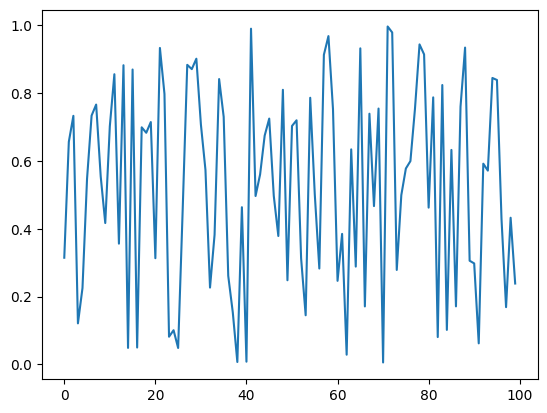

In [19]:
# Let's create a time series:
time_series = pd.Series(np.random.rand(100))
time_series.plot()

In [67]:
# This will compute the mean in a rolling window - ie, smooth it!
rolling_wnd_size = 10
smoothed = time_series.rolling(rolling_wnd_size).mean()

<Axes: >

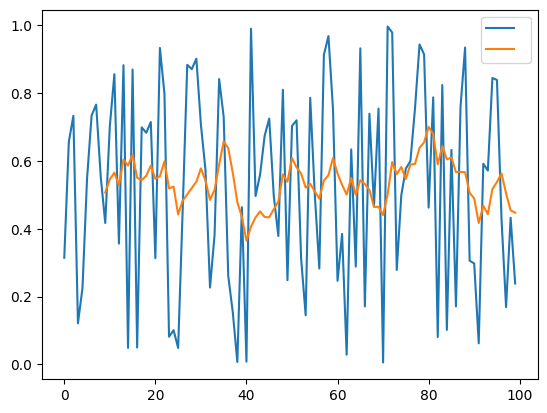

In [68]:
time_series.plot(legend="Original")
smoothed.plot(legend="Time averaged")

Note that there will be nan values at the borders, where we do not have enough data to compute the mean

By default, the window will not be centered:

In [69]:
dirac_series = pd.Series(np.zeros(30))
dirac_series[15] = 1

<Axes: >

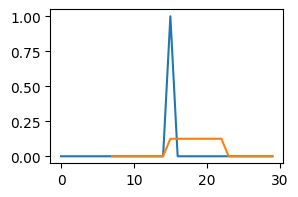

In [70]:
dirac_series.plot(figsize=(3,2))
dirac_series.rolling(8).mean().plot()

We can center the window with the `center=True` argument:

<Axes: >

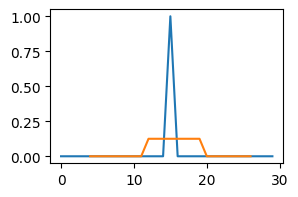

In [24]:
dirac_series.plot(figsize=(3,2))
dirac_series.rolling(8, center=True).mean().plot()

### Usage of `.rolling()`

When done with averaging, same results as other smoothing tools

But now we can use arbitrary functions! (standard deviation, significance tests, etc)

For example, we can look at the range of an oscillation with rolling `max()` and `min()`:

<Axes: >

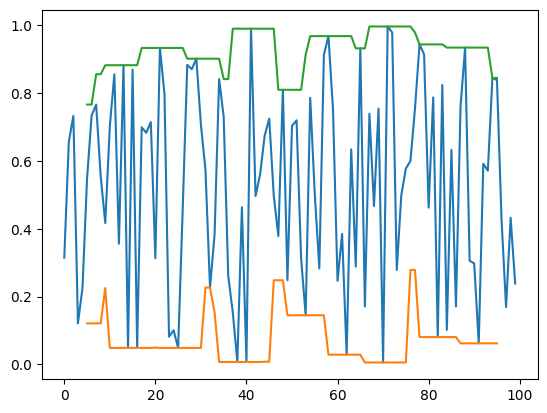

In [25]:
win_size = 10
time_series.plot()
time_series.rolling(window=win_size, center=True).min().plot()
time_series.rolling(window=win_size, center=True).max().plot()

(Practicals 1.4.2)